<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.9" color="8C3061"><b>Curso de Optimización</b></font> <br>
<font size="4.5" color="8C3061"><b>Tarea 1 - Fundamentos de Optimización</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


# <font color="8C3061" >**Cargar Librerías**</font> 

In [1]:
# basic libraries
import numpy as np
import pandas as pd
from typing import Tuple, Callable

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

----


# <font color="8C3061" >**Ejercicio 1 (3.5 puntos)**</font>



1. Programar el método de la sección dorada descrito en la diapositiva 9 de la Clase 3.
La función que implementa el método recibe como argumentos la función que se va
a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia
$\tau>0$, y el número máximo de iteraciones $N$.

   La función debe devolver el punto $x_k, f(x_k)$, los extremos del último intervalo de búsqueda
$[x_l, x_u]$, el número de iteraciones $k$ realizadas y la variable booleana $bres$
que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.

***Solución:***

En la implementación del algoritmo vamos a considerar el cambio de la condición *elif f(x1) > f(x3)* por *elif f(x1) >= f(x3)*, con el fin de que el algoritmo no se estanque con funciones simétricas y bajo el supuesto de que hay de todas maneras un mínimo en el intervalo.

In [2]:
def gold_section_method(f: Callable[[float], float], 
                        xl: float, 
                        xu: float, 
                        tol: float = (np.finfo(float).eps)**(1/3), 
                        max_iter: int=100) -> Tuple[float, float,float,float,int,bool]:
    """Gold Section Method to find the minimum of a function inside a specified interval.
    
    :param f: function to optimize (Callable[[float], float])
    :param xl: left of the interval (float)
    :param xu: right of the interval (float)
    :param tol: tolerance (float)
    :param max_iter: Maximum iterations allowed (int)
    
    :return: xk, f(xk), xu, xl, k, bres (Tuple[float, float,float,float,int,bool])
    """
    
    bres = False
    rho = (np.sqrt(5)-1)/2
    k = 1
    
    while k < max_iter+1:
        b = rho*(xu-xl)
        x1 = xu-b
        x3 = xl+b
        
        if f(x1) < f(x3):
            xu =x3
            xk=x1
        elif f(x1) >= f(x3):
            xl=x1
            xk=x3

        if np.abs(xu-xl) < tol:
            bres = True
            return xk,f(xk),xu,xl,k,bres
        k += 1
    
    return xk,f(xk),xu,xl,k,bres

In [3]:
def print_info_gsm(xk:float,
                   fxk:float,
                   xu:float,
                   xl:float,
                   k:int,
                   bres:bool):
    
    print("Información del método de la sección dorada:\n")
    print(f"El mínimo se encuentra en x = {xk}")
    print(f"El valor de la función en el mínimo es f(x) = {fxk}")
    print(f"El intervalo final es [{xl},{xu}]")
    print(f"El número de iteraciones fue {k}")
    print(f"El método fue exitoso? {bres}")

   
2. Probar el método con las funciones que se describen en las siguientes
   celdas. 
   - Use el intervalo que se especifica en cada caso y $N=50$.
   - Use como tolerancie $\tau = \epsilon_m^{1/3}$, donde $\epsilon_m$ es el épsilon de la máquina.
   - Imprima $k, x_k, f_k, x_u-x_l$ y $bres$. 

***Solución:***

***Función Objetivo 1:*** 

$$f_1(x) = -0.05x^3 + 8x + 3$$

In [4]:
# Function definition to test case 1
def fnc1(x:float)->float:
    return -0.05*x**3 + 8*x + 3

xl, xu = -20, 20

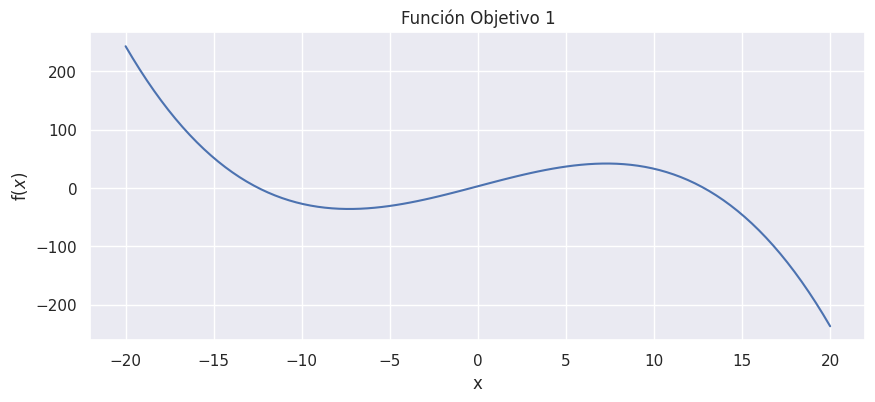

In [5]:
# Plot test case function 1
xx = np.linspace(xl, xu, 100)

plt.figure(figsize=(10,4))
plt.plot(xx, fnc1(xx))

plt.title('Función Objetivo 1')
plt.xlabel('x')
plt.ylabel('f$(x)$')
plt.show()

In [6]:
xk_1,fxk_1,xu_1,xl_1,k_1,bres_1 = gold_section_method(fnc1, xl, xu)
print_info_gsm(xk_1,fxk_1,xu_1,xl_1,k_1,bres_1)

Información del método de la sección dorada:

El mínimo se encuentra en x = -7.302967212715323
El valor de la función en el mínimo es f(x) = -35.94915964481176
El intervalo final es [-7.302970349467607,-7.302965274095799]
El número de iteraciones fue 33
El método fue exitoso? True


***Función Objetivo 2:***
$$f_2(x) = 1.5x^4 - 3x^2 + 2$$

In [7]:
# function definition to test case 2
def fnc2(x:float)->float:
    return 1.5*x**4 - 3*x**2 + 2

xl, xu = -2, 2

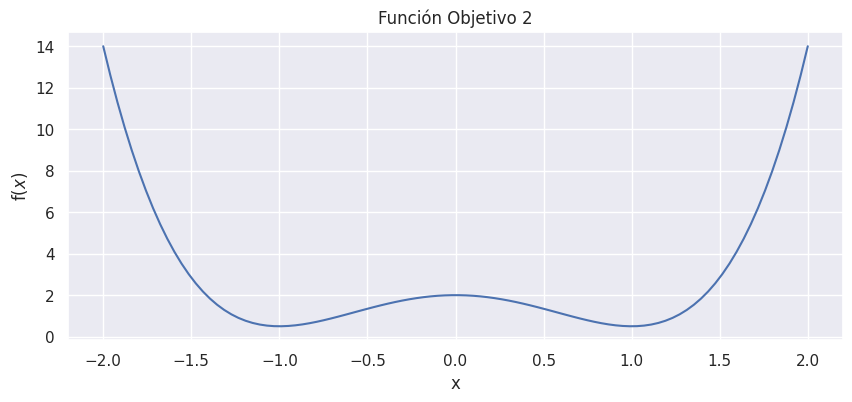

In [8]:
xx = np.linspace(xl, xu, 100)
plt.figure(figsize=(10,4))
plt.plot(xx, fnc2(xx))

plt.title('Función Objetivo 2')
plt.xlabel('x')
plt.ylabel('f$(x)$')
plt.show()

In [9]:
xk_1,fxk_1,xu_1,xl_1,k_1,bres_1 = gold_section_method(fnc2, xl, xu)
print_info_gsm(xk_1,fxk_1,xu_1,xl_1,k_1,bres_1)

Información del método de la sección dorada:

El mínimo se encuentra en x = 1.0000005374904997
El valor de la función en el mínimo es f(x) = 0.5000000000017331
El intervalo final es [0.9999983875285002,1.0000040162020893]
El número de iteraciones fue 28
El método fue exitoso? True


***Función Objetivo 3:***
$$f_3(x) = -(x + \sin(x))e^{-x^2}$$

In [10]:
# function definition to test case 3
def fnc3(x:float)->float:
    return -(x + np.sin(x))*np.exp(-x**2)

xl, xu = -10, 10

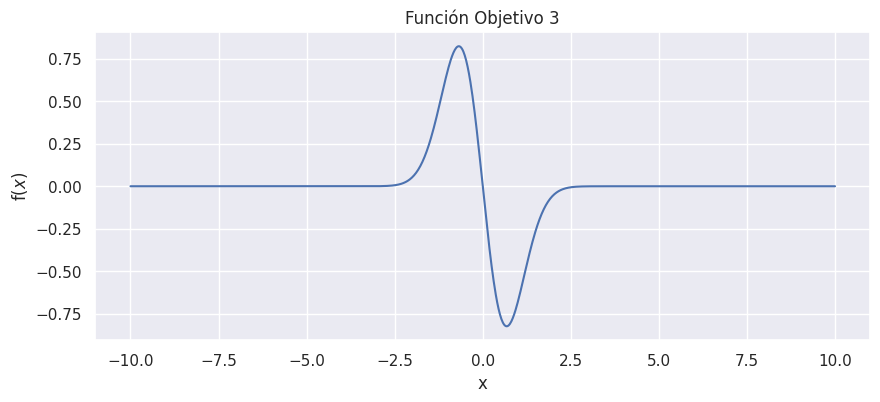

In [11]:
# Plot test case function 3
xx = np.linspace(xl, xu, 1000)
plt.figure(figsize=(10,4))
plt.plot(xx, fnc3(xx))

plt.title('Función Objetivo 3')
plt.xlabel('x')
plt.ylabel('f$(x)$')
plt.show()

In [12]:
xk_1,fxk_1,xu_1,xl_1,k_1,bres_1 = gold_section_method(fnc3, xl, xu)
print_info_gsm(xk_1,fxk_1,xu_1,xl_1,k_1,bres_1)

Información del método de la sección dorada:

El mínimo se encuentra en x = 0.6795782938545382
El valor de la función en el mínimo es f(x) = -0.8242393984758376
El intervalo final es [0.6795767254783963,0.6795808315404427]
El número de iteraciones fue 32
El método fue exitoso? True


---

# <font color="8C3061" >**Ejercicio 2**</font>

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

Dado el punto $\mathbf{x}_k$ y la dirección $\mathbf{d}_k$, definimos la función 
$g(t; \mathbf{x}_k, \mathbf{d}_k) = f(\mathbf{x}_k + t\mathbf{d}_k)$.

1. Programe las funciones  $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$.
2. Calcule de manera analítica el gradiente de $f(\mathbf{x})$ y programe la función correspondiente.
3. Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde 
   $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$.
   Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección
   $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.
4. Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y 
   $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,2]$.
5. Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$
   en el intervalo $[0, 2]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$,
   imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbf{x}_1$, $f(\mathbf{x}_1)$.
6. Repita los puntos 4 y 5 usando el intervalo $[0,8]$.



***Solución:***

1. Definición de las funciones $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$

In [13]:
def f(x:np.ndarray)->float:
    return (x[0]**2+x[1]**2)/4000-np.cos(x[0])*np.cos(x[1]/np.sqrt(2))+1

def g(t:float,xk:np.ndarray,dk:np.ndarray)->float:
    return f(xk+t*dk)

2. El gradiente de $f$ viene dado por:

$$\Delta(f)=\left( \frac{x_1}{2000}+\sin(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) ,
 \frac{x_2}{2000}+\frac{1}{\sqrt{2}}\cos(x_1)\sin\left(\frac{x_2}{\sqrt{2}}\right) 
\right)$$

In [14]:
def grad_f(x:np.ndarray)->np.ndarray:
    return np.array([x[0]/2000+np.sin(x[0])*np.cos(x[1]/np.sqrt(2)),
                     x[1]/2000+np.sin(x[1]/np.sqrt(2))*np.cos(x[0])/np.sqrt(2)])

3. Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde 
   $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$.
   Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección
   $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.

In [15]:
x0 = np.array([3,0.5])
p = np.array([2,1])
d0 = p/np.linalg.norm(p)
g0 = grad_f(x0)/np.linalg.norm(grad_f(x0))

In [16]:
print("Derivada direccional de f en x0\n")
print("Dirección  d_0:",round(grad_f(x0)@d0,5))
print("Dirección -g_0:",round(grad_f(x0)@(-g0),5))

Derivada direccional de f en x0

Dirección  d_0: 0.01148
Dirección -g_0: -0.27668


4. Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y 
   $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,2]$.

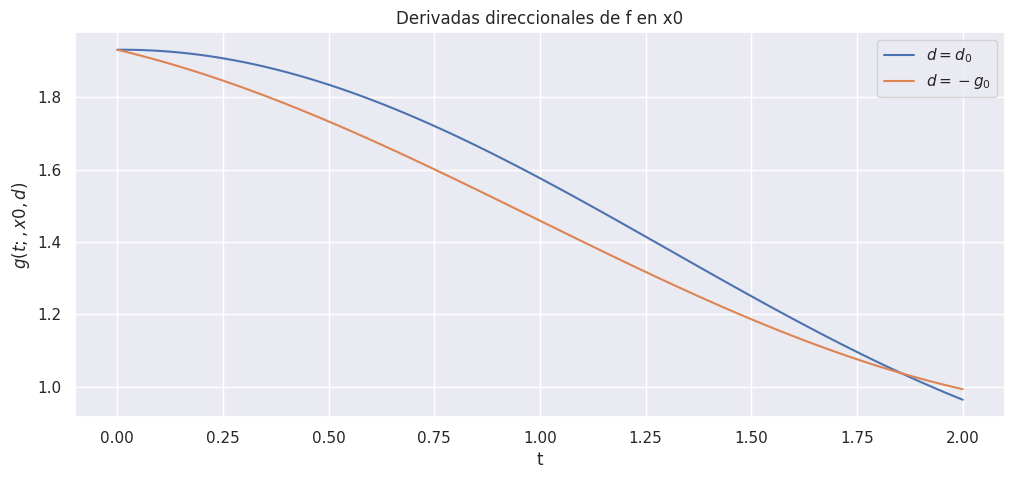

In [17]:
t = np.linspace(0,2,100)
y1 = np.array([g(t0,x0,d0) for t0 in t])
y2 = np.array([g(t0,x0,-g0) for t0 in t])
plt.figure(figsize=(12,5))
plt.plot(t,y1,label="$d = d_0$")
plt.plot(t,y2,label="$d =-g_0$")
plt.legend()
plt.title("Derivadas direccionales de f en x0")
plt.xlabel("t")
plt.ylabel("$g(t;,x0,d)$")
plt.show()

5. Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$
   en el intervalo $[0, 2]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$,
   imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbf{x}_1$, $f(\mathbf{x}_1)$.

In [18]:
xk_1,fxk_1,xu_1,xl_1,k_1,bres_1 = gold_section_method(lambda t: g(t,x0,-g0),0,2)
print_info_gsm(xk_1,fxk_1,xu_1,xl_1,k_1,bres_1)

Información del método de la sección dorada:

El mínimo se encuentra en x = 1.9999971856632055
El valor de la función en el mínimo es f(x) = 0.9932410001528889
El intervalo final es [1.9999954463074106,2]
El número de iteraciones fue 27
El método fue exitoso? True


In [19]:
t0 = xk_1
x1 = x0-t0*g0

print("   x0:",x0)
print("f(x0):",f(x0))
print("   t0:",t0)
print("   x1:",x1)
print("f(x1):",f(x1))

   x0: [3.  0.5]
f(x0): 1.9310723123875322
   t0: 1.9999971856632055
   x1: [2.03215236 2.25021704]
f(x1): 0.9932410001528889


6. Cambiar el intervalo a $[0,8]$ y repetir el procedimiento.

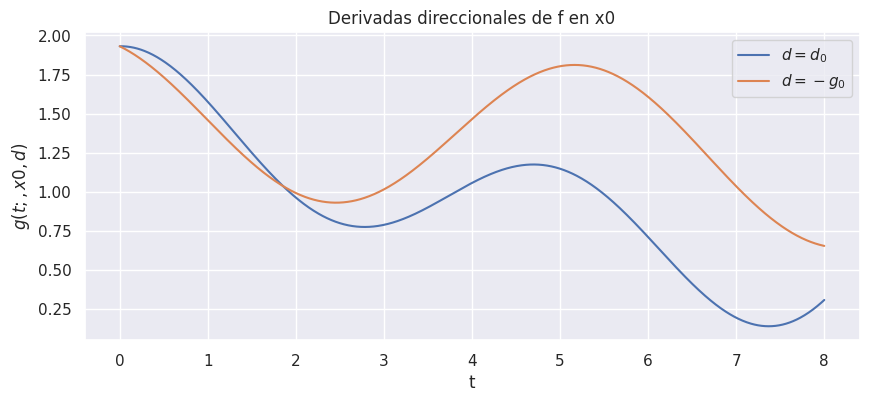

In [20]:
t = np.linspace(0,8,1000)
y1 = np.array([g(t0,x0,d0) for t0 in t])
y2 = np.array([g(t0,x0,-g0) for t0 in t])
plt.figure(figsize=(10,4))
plt.plot(t,y1,label="$d = d_0$")
plt.plot(t,y2,label="$d =-g_0$")
plt.legend()
plt.title("Derivadas direccionales de f en x0")
plt.xlabel("t")
plt.ylabel("$g(t;,x0,d)$")
plt.show()

In [21]:
xk_1,fxk_1,xu_1,xl_1,k_1,bres_1 = gold_section_method(lambda t: g(t,x0,-g0),0,8)
print_info_gsm(xk_1,fxk_1,xu_1,xl_1,k_1,bres_1)

Información del método de la sección dorada:

El mínimo se encuentra en x = 2.4561060376666815
El valor de la función en el mínimo es f(x) = 0.9315587863963393
El intervalo final es [2.456103380167501,2.4561076800915003]
El número de iteraciones fue 30
El método fue exitoso? True


In [22]:
t0 = xk_1
x1 = x0-t0*g0

print("   x0:",x0)
print("f(x0):",f(x0))
print("   t0:",t0)
print("   x1:",x1)
print("f(x1):",f(x1))

   x0: [3.  0.5]
f(x0): 1.9310723123875322
   t0: 2.4561060376666815
   x1: [1.81143011 2.64936234]
f(x1): 0.9315587863963393


---

# <font color="8C3061" >**Ejercicio 3**</font>

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la
función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.

***Solución:***

Por la regla del producto tenemos que el gradiente es:

$$\Delta (f)= (\mathbf{b}^\top \mathbf{x})\Delta(\mathbf{a}^\top \mathbf{x})+(\mathbf{a}^\top \mathbf{x})\Delta(\mathbf{b}^\top \mathbf{x}) = (\mathbf{b}^\top \mathbf{x})\mathbf{a}^\top+(\mathbf{a}^\top \mathbf{x})\mathbf{b}^\top $$

Ahora bien, como

$$\Delta(f)= 
\begin{bmatrix}
(\sum_ix_{i}b_i)a_1 \\
 (\sum_ix_{i}b_i)a_2  \\
  \vdots \\
 (\sum_ix_{i}b_i)a_n 
\end{bmatrix}+
\begin{bmatrix}
(\sum_ix_{i}a_i)b_1 \\
 (\sum_ix_{i}a_i)b_2  \\
  \vdots \\
 (\sum_ix_{i}a_i)b_n 
\end{bmatrix}$$




la Hessiana queda expresada como:

$$\Delta^2(f)=
\begin{bmatrix}
b_1a_1 &\cdots & b_na_1\\
b_1a_2 &\cdots & b_na_2 \\
  \vdots &\ddots & \vdots \\
 b_1a_n &\cdots & b_na_n
\end{bmatrix}
+
\begin{bmatrix}
b_1a_1 &\cdots & b_1a_n\\
b_2a_1 &\cdots & b_2a_n \\
  \vdots &\ddots & \vdots \\
 b_na_1 &\cdots & b_na_n
\end{bmatrix}
=\mathbf{a}\mathbf{b}^\top+\mathbf{b}\mathbf{a}^\top$$

---

# <font color="8C3061" >**Ejercicio 4**</font>
Tenemos los valores de la derivada direccional $\frac{\partial f}{\partial \mathbf{p}_i}$ 
de $f$ en el punto $\mathbf{x}_0$ para tres direcciones $\mathbf{p}_i$:

$$ \frac{\partial f}{\partial \mathbf{p}_1}(\mathbf{x}_0) = \frac{3}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_1 = \left(0,\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_2}(\mathbf{x}_0) = \frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_2 = \left(\frac{1}{\sqrt{2}},0,\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_3}(\mathbf{x}_0) = -\frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_3 = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \right)^\top.$$

A partir de esto, calcule el vector gradiente $\nabla f(\mathbf{x}_0)$.

***Solución:***

Supongamos que $f$ es diferenciable en un abierto conexo $D\subset \mathbb{R}$ y que $x_0\in D$. Entonces, $\frac{\partial f}{\partial \mathbf{p}_i}(\mathbf{x}_0)=\Delta f(\mathbf{x}_0)^T\mathbf{p}_i$. 

De modo que por las ecuaciones, $\Delta f(\mathbf{x}_0)^T\mathbf{p}_1=\frac{3}{\sqrt{2}}$, $\Delta f(\mathbf{x}_0)^T\mathbf{p}_2=\frac{1}{\sqrt{2}}$ y $\Delta f(\mathbf{x}_0)^T\mathbf{p}_3=-\frac{1}{\sqrt{2}}$, se deduce el siguiente sistema lineal de ecuaciones $A y = b$, donde $b = (3/\sqrt{2},1/\sqrt{2},-1/\sqrt{2})$, $y=\Delta f(\mathbf{x}_0)$  y 

$$
\begin{equation}
A =\begin{bmatrix}
0 & 1/\sqrt{2} & 1/\sqrt{2}\\
1/\sqrt{2} & 0 & 1/\sqrt{2}\\
1/\sqrt{2} & 1/\sqrt{2} & 0
\end{bmatrix}
\end{equation}
$$

Matriz cuyas filas son iguales a las direcciones $\mathbf{p}_i$. Vamos a resolver el anterior sistema de forma numérica usando la paquetería de Numpy

In [23]:
A =np.array([[0,1/np.sqrt(2),1/np.sqrt(2)],
             [1/np.sqrt(2),0,1/np.sqrt(2)],
             [1/np.sqrt(2),1/np.sqrt(2),0]])
b = np.array([3/np.sqrt(2),1/np.sqrt(2),-1/np.sqrt(2)])

np.linalg.solve(A,b)

array([-1.5,  0.5,  2.5])

Obtenemos así, que el gradiente de $f$ en $\mathbf{x}_0$ es  $\nabla f(\mathbf{x}_0) = (-1.5,  0.5,  2.5)$.